In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(
    "D:/Python_Projects/Classification/winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot: xlabel='quality', ylabel='count'>

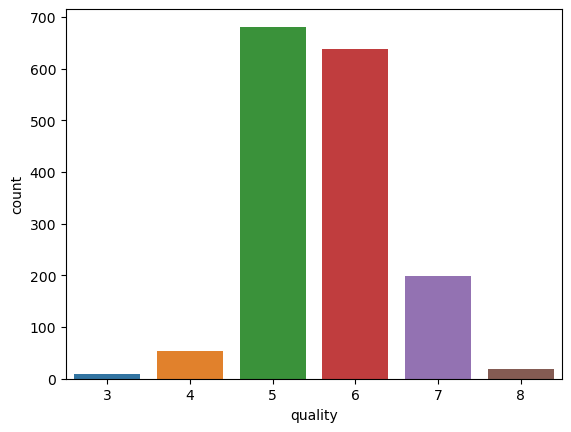

In [37]:
sns.countplot(x="quality", data=df)

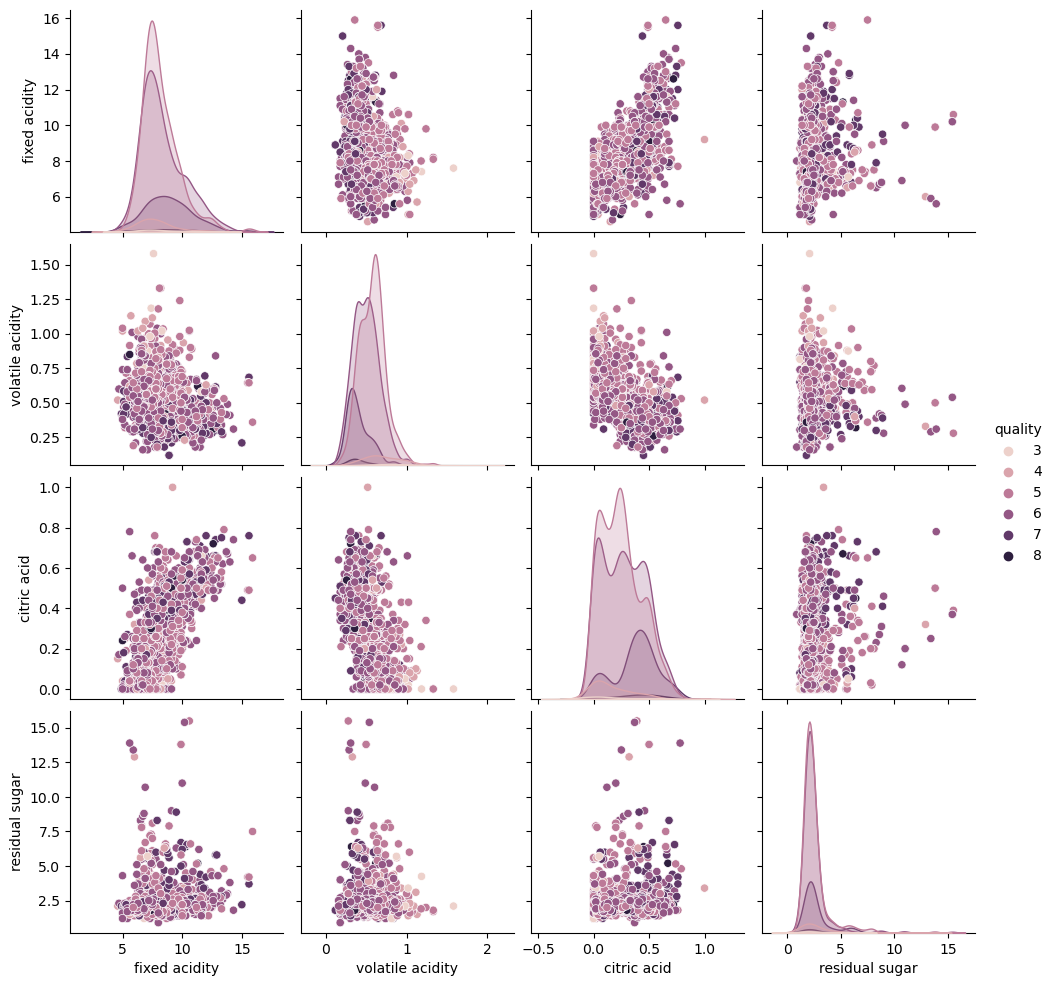

In [38]:
sns.pairplot(
    df[
        [
            'fixed acidity', 'volatile acidity',
            'citric acid', 'residual sugar',
            'quality'
        ]
    ],
    hue="quality"
)

<AxesSubplot: >

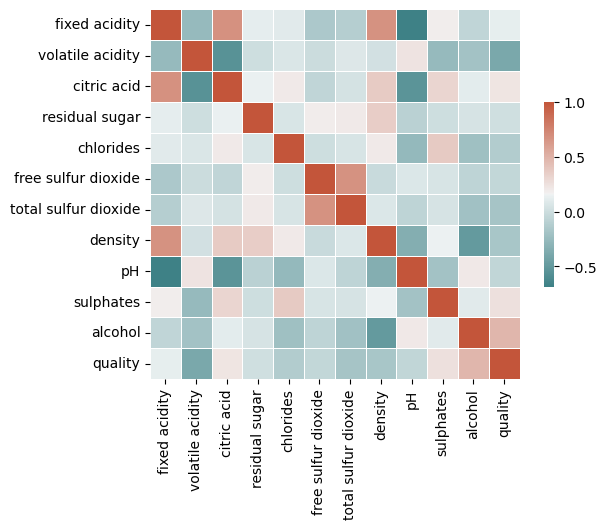

In [39]:
cmap = sns.diverging_palette(200, 20, as_cmap=True)

sns.heatmap(
    df.corr(), cmap=cmap,
    square=True, linewidths=.5, cbar_kws={"shrink": .5}
)

In [40]:
x = df.copy()
y = df['quality']
del x['quality']

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x, y, random_state=30, train_size=0.8, stratify=y, shuffle=True
)

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 1493 to 200
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
dtypes: float64(11)
memory usage: 119.9 KB


In [42]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 68 to 1369
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         320 non-null    float64
 1   volatile acidity      320 non-null    float64
 2   citric acid           320 non-null    float64
 3   residual sugar        320 non-null    float64
 4   chlorides             320 non-null    float64
 5   free sulfur dioxide   320 non-null    float64
 6   total sulfur dioxide  320 non-null    float64
 7   density               320 non-null    float64
 8   pH                    320 non-null    float64
 9   sulphates             320 non-null    float64
 10  alcohol               320 non-null    float64
dtypes: float64(11)
memory usage: 30.0 KB


In [70]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

tree_baseline = DecisionTreeClassifier(max_depth=8)
tree_baseline.fit(x_train, y_train)

y_train_predicted_tree = tree_baseline.predict_proba(x_train)
y_val_predicted_tree = tree_baseline.predict_proba(x_val)

roc_tree_train = roc_auc_score(y_train, y_train_predicted_tree, multi_class='ovr')
roc_tree_val = roc_auc_score(y_val, y_val_predicted_tree, multi_class='ovr')

print(f"ROC AUC train {roc_tree_train}")
print(f"ROC AUC val {roc_tree_val}")

ROC AUC train 0.9527822897009893
ROC AUC val 0.7224091546467708


Text(0.5, 0, 'Predicted values')

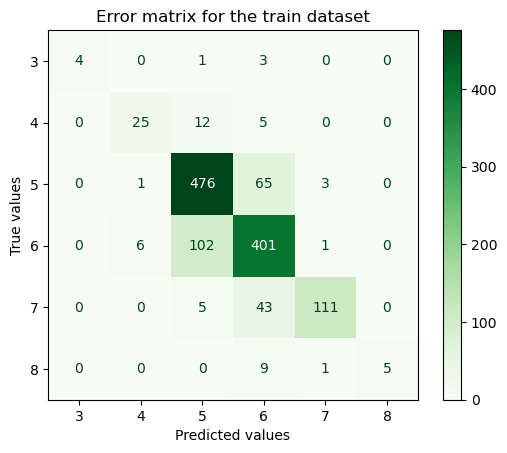

In [56]:
display = ConfusionMatrixDisplay.from_estimator(
    tree_baseline,
    x_train,
    y_train,
    cmap=plt.cm.Greens,
)
display.ax_.set_title('Error matrix for the train dataset')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

Text(0.5, 0, 'Predicted values')

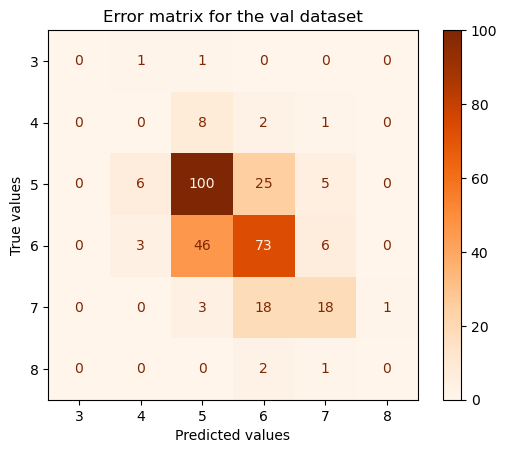

In [57]:
display = ConfusionMatrixDisplay.from_estimator(
    tree_baseline,
    x_val,
    y_val,
    cmap=plt.cm.Oranges,
)
display.ax_.set_title('Error matrix for the val dataset')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [71]:
#Bootstrap aggregating

r_forest = RandomForestClassifier(max_depth=7)
r_forest.fit(x_train, y_train)

y_train_predicted = r_forest.predict_proba(x_train)
y_val_predicted = r_forest.predict_proba(x_val)

roc_train = roc_auc_score(y_train, y_train_predicted, multi_class='ovr')
roc_val = roc_auc_score(y_val, y_val_predicted, multi_class='ovr')

print(f"ROC AUC train {roc_train}")
print(f"ROC AUC val {roc_val}")

ROC AUC train 0.9780198341687335
ROC AUC val 0.8134243218819287


Text(0.5, 0, 'Predicted values')

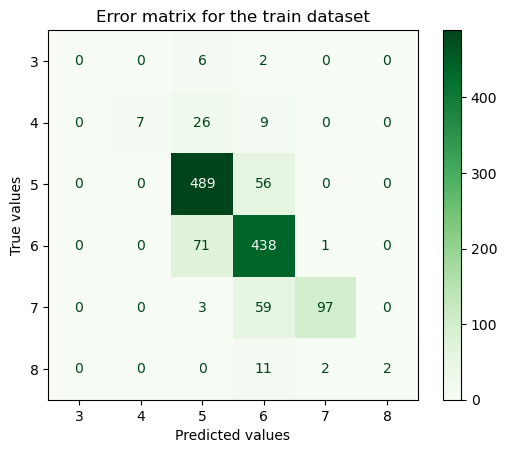

In [72]:
display = ConfusionMatrixDisplay.from_estimator(
    r_forest,
    x_train,
    y_train,
    cmap=plt.cm.Greens,
)
display.ax_.set_title('Error matrix for the train dataset')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

Text(0.5, 0, 'Predicted values')

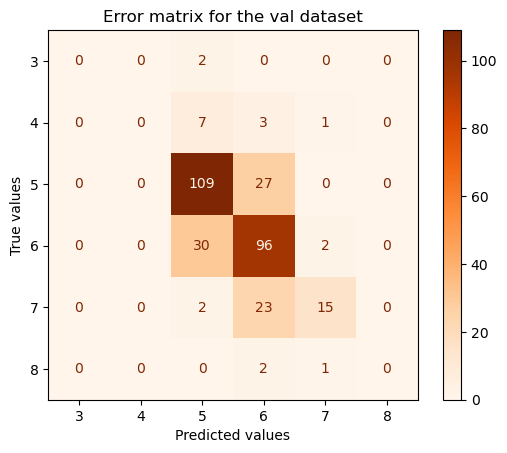

In [73]:
display = ConfusionMatrixDisplay.from_estimator(
    r_forest,
    x_val,
    y_val,
    cmap=plt.cm.Oranges,
)
display.ax_.set_title('Error matrix for the val dataset')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

In [74]:
#Boosting 
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

y_train_predicted = clf.predict_proba(x_train)
y_val_predicted = clf.predict_proba(x_val)

roc_train = roc_auc_score(y_train, y_train_predicted, multi_class='ovr')
roc_val = roc_auc_score(y_val, y_val_predicted, multi_class='ovr')

print(f"ROC AUC train {roc_train}")
print(f"ROC AUC val {roc_val}")

ROC AUC train 0.9892059268724219
ROC AUC val 0.8270308824155262


Text(0.5, 0, 'Predicted values')

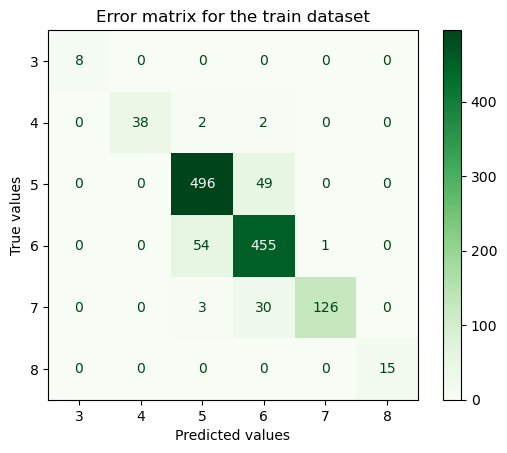

In [75]:
display = ConfusionMatrixDisplay.from_estimator(
    clf,
    x_train,
    y_train,
    cmap=plt.cm.Greens,
)
display.ax_.set_title('Error matrix for the train dataset')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')

Text(0.5, 0, 'Predicted values')

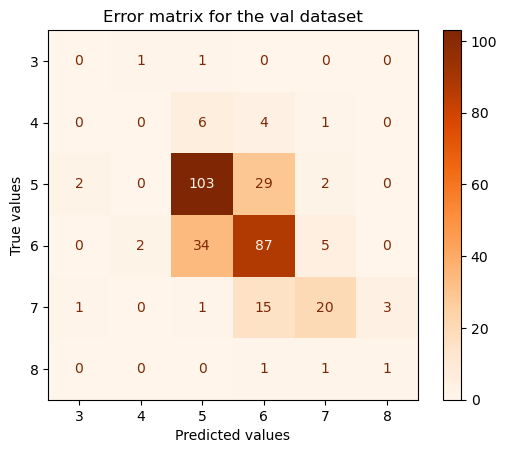

In [76]:
display = ConfusionMatrixDisplay.from_estimator(
    clf,
    x_val,
    y_val,
    cmap=plt.cm.Oranges,
)
display.ax_.set_title('Error matrix for the val dataset')
display.ax_.set_ylabel('True values')
display.ax_.set_xlabel('Predicted values')